<a href="https://colab.research.google.com/github/CharlBrill89/TitanicDatasets/blob/master/Titanic_CB_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://cdn.britannica.com/79/4679-050-BC127236/Titanic.jpg)


#Titanic Disaster classification model
This model is used to produce an output file for a Kaggle competition:
---
Titanic: Machine Learning from disaster: https://www.kaggle.com/c/titanic/overview 

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

It follows a kernel developed by: Manav Sehgal
https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook

In [0]:
#!pip install sklearn

In [0]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualizations
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style("white")
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Use the newest version of TensorFlow 2.0
%tensorflow_version 2.x 

# pandas
import pandas as pd
from pandas import Series,DataFrame


In [0]:
# Storing the data in a pandas data frame.
file_name_train = 'https://raw.githubusercontent.com/CharlBrill89/TitanicDatasets/master/train.csv'
file_name_test = 'https://raw.githubusercontent.com/CharlBrill89/TitanicDatasets/master/test.csv'

train_df = pd.read_csv(file_name_train)
test_df = pd.read_csv(file_name_test)
combine = [train_df, test_df]
'''
tit1=train.select_dtypes(include=['float64','int64','object'])'''

"\ntit1=train.select_dtypes(include=['float64','int64','object'])"

#Explore dataset (EDA)

## Initial investigation

In [0]:
print("Train shape:",train_df.shape)
print("Test shape :",test_df.shape)

Train shape: (891, 12)
Test shape : (418, 11)


In [0]:
train_df.info()
print("-"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

Classification of Variables:     
* Identifier: PassengerId
* Categorical: Name, Ticket, Survived, Sex, Embarked, Cabin          
* Ordinal: Pclass        
* Continous: Age, Fare
* Discrete: SibSp, Parch



## **Main insights**
* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
* Survived is a categorical feature with 0 or 1 values.
* Around 38% samples survived representative of the actual survival rate at 32%.
* Most passengers (> 75%) did not travel with parents or children.
* Nearly 30% of the passengers had siblings and/or spouse aboard.
* Fares varied significantly with few passengers (<1%) paying as high as $512.
* Few elderly passengers (<1%) within age range 65-80.

In [0]:
train_df.head()
#test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
train_df.describe(include=['O'])
#train_df.describe(include='['O']')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ball, Mrs. (Ada E Hall)",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [0]:
#What percentage of passengers were male vs female?
titanic_copy = train_df

men_df = titanic_copy[titanic_copy['Sex']=='male']
num_men = men_df['Sex'].count()
women_df = titanic_copy[titanic_copy['Sex']=='female']
num_women = women_df['Sex'].count()
total_passengers = num_men + num_women 

print('Total men: ', num_men,"(", round(num_men/total_passengers,2)*100, "%)")
print('Total women: ', num_women,"(", round(num_women/total_passengers,2)*100, "%)")

Total men:  577 ( 65.0 %)
Total women:  314 ( 35.0 %)


In [0]:
#What percentage of passengers survived?
survived = titanic_copy.groupby('Survived')
survived.size()
#survived[survived['Sex']==1]
#survived#.count()
#sm = survived[survived['Sex']=='male']
#suv_sex = survived.groupby('Sex')

Survived
0    549
1    342
dtype: int64

In [0]:
# Summarize our dataset 
print ("Rows     : " ,titanic_copy.shape[0])
print ("Columns  : " ,titanic_copy.shape[1])
print ("\nFeatures : \n" ,titanic_copy.columns.tolist())
print ("\nMissing values :  ", titanic_copy.isnull().sum().values.sum())
print ("\nUnique values :  \n",titanic_copy.nunique())

Rows     :  891
Columns  :  12

Features : 
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Missing values :   866

Unique values :  
 PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [0]:
titanic_data = pd.DataFrame(titanic_copy['Survived'].value_counts(sort = False))
#churn_df.apply(lambda x: 100 * x / float(x.sum()))
titanic_data
titanic_data.apply(lambda x: round(100 * x / float(x.sum()),2))

,Survived
0,61.62
1,38.38


In [0]:
# Create a new dataset called summary so that we can summarize our survival data
# Crosstab - Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.
#summary = pd.concat([pd.crosstab(titanic_copy[x], titanic_copy.Survived) for x in titanic_copy.columns[:-1]], keys=titanic_copy.columns[:-1])
summary = pd.crosstab(titanic_copy['Survived'],'Sex').apply(lambda x: round(100 * x / float(x.sum()),2))
    
summary

col_0,Sex
Survived,
0,61.62
1,38.38


Assumtions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

**Correlating**

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

**Completing**

We may want to complete Age feature as it is definitely correlated to survival.
We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

**Correcting**

Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
PassengerId may be dropped from training dataset as it does not contribute to survival.
Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

**Creating**

We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
We may want to engineer the Name feature to extract Title as a new feature.
We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
We may also want to create a Fare range feature if it helps our analysis.

**Classifying**

We may also add to our assumptions based on the problem description noted earlier.

Women (Sex=female) were more likely to have survived.
Children (Age<?) were more likely to have survived.
The upper-class passengers (Pclass=1) were more likely to have survived.

## **Group variables**

In [0]:
#View survived mean percentage by passenger class
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [0]:
#View survived mean percentage by Gender
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [0]:
#View survived mean percentage by sibling/spouse
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [0]:
#View survived mean percentage by Parent/ children
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


##Analyse by visualising data

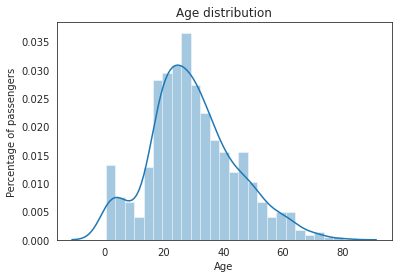

In [0]:
#Distributions
sns.set_style("white")
sns.distplot(titanic_copy['Age'], bins=25, kde=True)
_ = plt.ylabel('Percentage of passengers')
_ = plt.title("Age distribution")

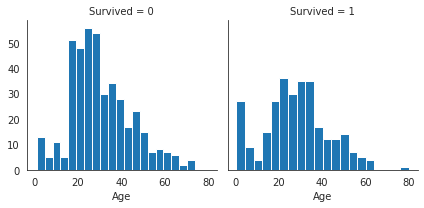

In [0]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


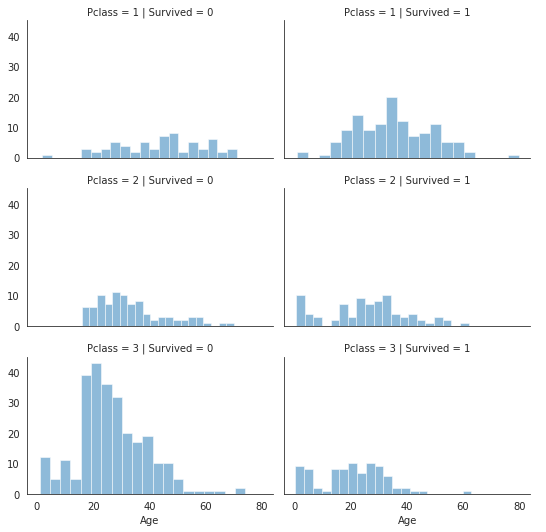

In [0]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.5, aspect=1.5)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


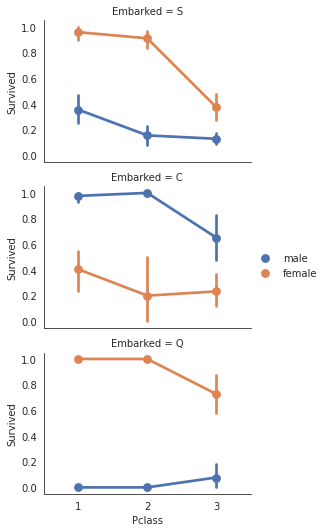

In [0]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.5, aspect=1.5)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


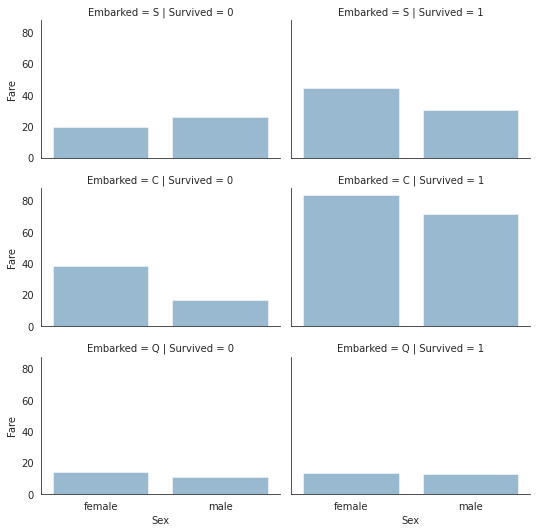

In [0]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.5, aspect=1.5)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

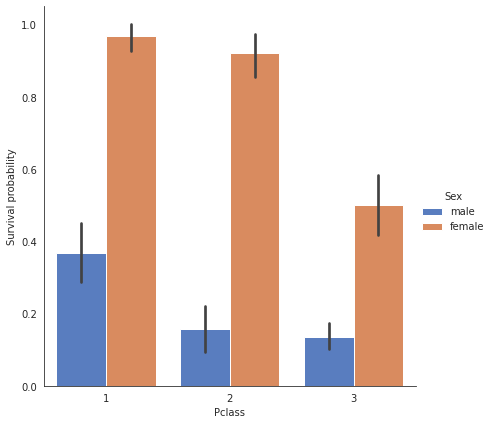

In [0]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=titanic_copy,
                height=6, kind="bar", palette="muted")
g.set_ylabels("Survival probability")

#**Wrangle data**

In [0]:
#Drop features that dont add value
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [0]:
#Explore which fields contain Nulls
# Let's write a function to print the total percentage of the missing values.
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [0]:
missing_percentage(titanic_copy)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [0]:
#Explore which fields contain Nulls
titanic_copy.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
#Explore titles
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [0]:
#Correct for some of the titles that seem misspelled
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [0]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [0]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [0]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


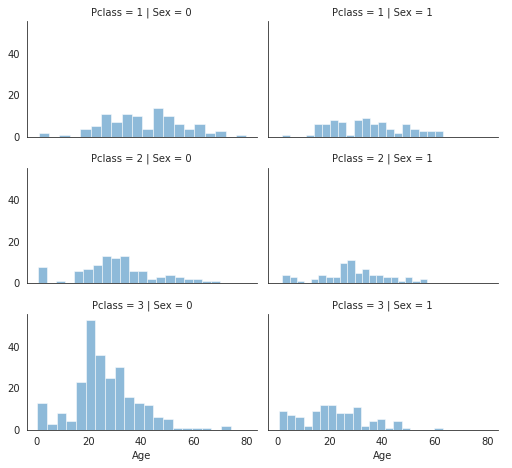

In [0]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [0]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

## Completing a numerical continuous feature (fill Age)

In [0]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            #print(guess_df[i,j])
            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            #print(i,j,guess_ages[i,j])

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [0]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [0]:
#Classify Ages into buckets
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [0]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [0]:
#Create a new variable called FamilySize
#We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [0]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [0]:
#train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
#test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,7.2500,S,1,2,0
1,1,1,1,2,71.2833,C,3,2,0
2,1,3,1,1,7.9250,S,2,1,1
3,1,1,1,2,53.1000,S,3,2,0
4,0,3,0,2,8.0500,S,1,1,1


In [0]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)
#train_df.head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [0]:
#Convert Embarked to a numeric variable 
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head(20)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,2,0,3
1,1,1,1,2,71.2833,1,3,2,0,2
2,1,3,1,1,7.9250,0,2,1,1,3
3,1,1,1,2,53.1000,0,3,2,0,2
4,0,3,0,2,8.0500,0,1,1,1,6
5,0,3,0,1,8.4583,2,1,1,1,3
6,0,1,0,3,51.8625,0,1,1,1,3
7,0,3,0,0,21.0750,0,4,5,0,0
8,1,3,1,1,11.1333,0,3,3,0,3
9,1,2,1,0,30.0708,1,3,2,0,0


In [0]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,1,6
1,893,3,1,2,7.0000,0,3,2,0,6
2,894,2,0,3,9.6875,2,1,1,1,6
3,895,3,0,1,8.6625,0,1,1,1,3
4,896,3,1,1,12.2875,0,3,3,0,3


In [0]:
#Create a Fare Band variable to be included in the model

train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [0]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,0,0,1,2,0,3
1,1,1,1,2,3,1,3,2,0,2
2,1,3,1,1,1,0,2,1,1,3
3,1,1,1,2,3,0,3,2,0,2
4,0,3,0,2,1,0,1,1,1,6
5,0,3,0,1,1,2,1,1,1,3
6,0,1,0,3,3,0,1,1,1,3
7,0,3,0,0,2,0,4,5,0,0
8,1,3,1,1,1,0,3,3,0,3
9,1,2,1,0,2,1,3,2,0,0


In [0]:
train_df.head(10)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    891 non-null    int64
 1   Pclass      891 non-null    int64
 2   Sex         891 non-null    int64
 3   Age         891 non-null    int64
 4   Fare        891 non-null    int64
 5   Embarked    891 non-null    int64
 6   Title       891 non-null    int64
 7   FamilySize  891 non-null    int64
 8   IsAlone     891 non-null    int64
 9   Age*Class   891 non-null    int64
dtypes: int64(10)
memory usage: 69.7 KB


In [0]:
test_df.head(10)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Age          418 non-null    int64
 4   Fare         418 non-null    int64
 5   Embarked     418 non-null    int64
 6   Title        418 non-null    int64
 7   FamilySize   418 non-null    int64
 8   IsAlone      418 non-null    int64
 9   Age*Class    418 non-null    int64
dtypes: int64(10)
memory usage: 32.8 KB


# Build the models

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

'''X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]'''
X_test_given  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test_given.shape


# Split it to a 70:30 Ratio Train:Test
X = train_df.drop("Survived", axis=1)
Y = train_df["Survived"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [0]:
print(X_train)
print(Y_train)
print(X_test)

     Pclass  Sex  Age  Fare  Embarked  Title  FamilySize  IsAlone  Age*Class
325       1    1    2     3         1      2           1        1          2
24        3    1    0     2         0      2           5        0          0
241       3    1    1     2         2      2           2        0          3
444       3    0    1     1         0      1           1        1          3
814       3    0    1     1         0      1           1        1          3
..      ...  ...  ...   ...       ...    ...         ...      ...        ...
514       3    0    1     0         0      1           1        1          3
730       1    1    1     3         0      2           1        1          1
2         3    1    1     1         0      2           1        1          3
242       2    0    1     1         0      1           1        1          2
363       3    0    2     0         0      1           1        1          6

[623 rows x 9 columns]
325    1
24     0
241    1
444    1
814    0
      .

##Logistic Regression

In [0]:
# Logistic Regression model

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log


82.66

In [0]:
# Fit (train) the Logistic Regression classifier
logreg_clf = LogisticRegression()
logreg_model = logreg_clf.fit(X_train, Y_train)
logreg_prediction = logreg_clf.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(logreg_prediction, Y_test)))

# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(logreg_prediction, Y_test))
print(classification_report(logreg_prediction, Y_test))

Accuracy 83.21%
[[149  25]
 [ 20  74]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       174
           1       0.75      0.79      0.77        94

    accuracy                           0.83       268
   macro avg       0.81      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



In [0]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.250504
5,Title,0.447371
3,Fare,0.326100
4,Embarked,0.266455
8,Age*Class,-0.188938
7,IsAlone,-0.289477
2,Age,-0.309533
6,FamilySize,-0.548747
0,Pclass,-0.683152


##Support Vector Machines model

In [0]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.34

##K-Nearest Neighbours

In [0]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test_given)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

86.04

In [0]:
Y_pred_knn.size

418

In [0]:
knn_model = knn.fit(X_train, Y_train)
knn_prediction = knn.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(knn_prediction, Y_test)))

# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(knn_prediction, Y_test))
print(classification_report(knn_prediction, Y_test))

Accuracy 81.72%
[[146  25]
 [ 24  73]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       171
           1       0.74      0.75      0.75        97

    accuracy                           0.82       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



##Gaussian Naive Bayes

In [0]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

59.87

##Perceptron

In [0]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

76.4

##Linear SVC

In [0]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


82.18

##Decision Tree


In [0]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

90.05

In [0]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
dot_data = StringIO()  
export_graphviz(dectree_grid, out_file=dot_data,  
                feature_names=column_names,  class_names = (["Survived" if int(i) is 1 else "Not_survived" for i in y.unique()]),
                filled=True, rounded=True,
                proportion=True,
                special_characters=True)  
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

## alternative tree
#import graphviz
#from sklearn import tree
#dot_data = tree.export_graphviz(decision_tree=dectree_grid, out_file=None, feature_names=column_names, )
#graph = graphviz.Source(dot_data)
#graph.render("house")
#graph

Image(graph.create_png())

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


NameError: ignored

##Random Forest

In [0]:
random_forest = RandomForestClassifier()#n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred_RandForest = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.09

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Fit (train) the Random Forest classifier
ranfor_clf = RandomForestClassifier()
ranfor_model = ranfor_clf.fit(X_train, Y_train)
ranfor_prediction = ranfor_clf.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(ranfor_prediction, Y_test)))

# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(ranfor_prediction, Y_test))
print(classification_report(ranfor_prediction, Y_test))

Accuracy 80.97%
[[140  34]
 [ 17  77]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.85       174
           1       0.69      0.82      0.75        94

    accuracy                           0.81       268
   macro avg       0.79      0.81      0.80       268
weighted avg       0.82      0.81      0.81       268



## Deep Learning model

In [0]:
# If you wish to use Tensorflow 1.X run the following line and then restart runtime
# %tensorflow_version 1.x 
# You'll need to change your import statements from tensorflow.keras to keras
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model_dl = Sequential()

# Hidden Layer 1
model_dl.add(Dense(500, activation='relu', input_dim=9, kernel_regularizer=l2(0.01)))
model_dl.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model_dl.add(Dense(250, activation='relu', kernel_regularizer=l2(0.01)))
model_dl.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 3
model_dl.add(Dense(125, activation = 'relu', kernel_regularizer=l2(0.01)))
model_dl.add(Dropout(0.3, noise_shape=None, seed=None))

#Ouput Layer
model_dl.add(Dense(1, activation='sigmoid'))

model_dl.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

# Display Model Summary and Show Parameters
model_dl.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               5000      
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 125)               31375     
_________________________________________________________________
dropout_2 (Dropout)          (None, 125)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [0]:
# Start Training Our Classifier 
batch_size = 5
epochs = 30

history = model_dl.fit(X_train,
                    Y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, Y_test))

score = model_dl.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
125/125 [==============================] - 0s 4ms/step - loss: 0.5794 - accuracy: 0.7737 - val_loss: 0.5920 - val_accuracy: 0.7575
Epoch 2/30
125/125 [==============================] - 1s 4ms/step - loss: 0.5705 - accuracy: 0.8026 - val_loss: 0.5155 - val_accuracy: 0.8134
Epoch 3/30
125/125 [==============================] - 0s 4ms/step - loss: 0.5698 - accuracy: 0.7897 - val_loss: 0.5043 - val_accuracy: 0.8321
Epoch 4/30
125/125 [==============================] - 0s 4ms/step - loss: 0.5551 - accuracy: 0.7897 - val_loss: 0.4820 - val_accuracy: 0.8396
Epoch 5/30
125/125 [==============================] - 0s 4ms/step - loss: 0.5606 - accuracy: 0.7961 - val_loss: 0.5147 - val_accuracy: 0.7985
Epoch 6/30
125/125 [==============================] - 1s 4ms/step - loss: 0.5545 - accuracy: 0.7865 - val_loss: 0.5038 - val_accuracy: 0.8507
Epoch 7/30
125/125 [==============================] - 0s 4ms/step - loss: 0.5177 - accuracy: 0.8026 - val_loss: 0.4692 - val_accuracy: 0.8246
Epoch 

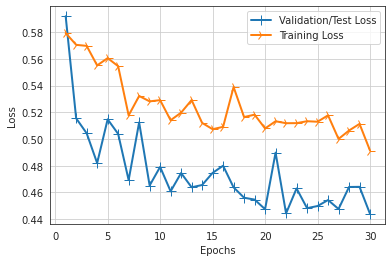

In [0]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

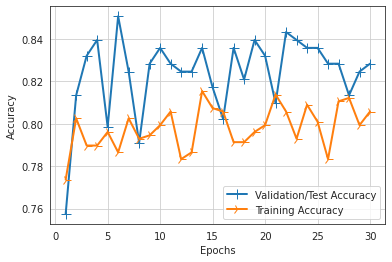

In [0]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Model Evaluation

In [0]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Decision Tree,90.05
3,Random Forest,89.09
1,KNN,87.16
2,Logistic Regression,82.66
0,Support Vector Machines,82.34
6,Linear SVC,82.18
5,Perceptron,76.40
4,Naive Bayes,59.87


#Output submission file

In [0]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_knn #Y_pred_RandForest
    })

submission
#submission.to_csv(r'submission_CB.csv', index=False, header=True)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [0]:
submission_data = pd.DataFrame(submission['Survived'].value_counts(sort = False))
#churn_df.apply(lambda x: 100 * x / float(x.sum()))

submission_data.apply(lambda x: round(100 * x / float(x.sum()),2))

,Survived
0,61.24
1,38.76
